# AAPL and GOOGL Analysis
The few cells below walk you through downloading some Apple AAPL and Google GOOGL stock data over the 
last year using a package called `yfinance` and then performing some analysis on it.

This section will require you start familiarising yourself with `numpy` and `pandas` so if you need to,
read a few beginners blogs / a few beginners YouTube videos on these packages. They are both very related
and `pandas` is built on top of `numpy`.

`matplotlib` is also the main plotting library used in python data analytics, so we'll start getting familiar
with this.

Do not use anything except the packages imported below to answer all of the questions.

In [38]:
# These are packages that we installed outselves, in pyproject.toml
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # plotting library

In [39]:
# 1. Download Apple and Google stock data from 2024-01-01 to 2025-01-01
data = yf.download(['AAPL', 'GOOGL'], start='2024-01-01', end='2025-01-01')

[*********************100%***********************]  2 of 2 completed


In [41]:
# 2. Have a glance at the data
#   We have two headers, the first header row contains Price, Close, High, Low, Open and Volume
#   The second header row is the ticker, so it is AAPL and GOOGL, for each of the prices (OCHL - open close high low)
data

Price            Close                    High                     Low  \
Ticker            AAPL       GOOGL        AAPL       GOOGL        AAPL   
Date                                                                     
2024-01-02  184.734985  137.670929  187.521338  138.946304  182.993517   
2024-01-03  183.351776  138.418228  184.973835  139.125670  182.535766   
2024-01-04  181.023163  135.897354  182.197403  138.657353  179.998185   
2024-01-05  180.296707  135.239746  181.869006  136.664589  179.291637   
2024-01-08  184.655365  138.338516  184.695178  138.507900  180.615161   
...                ...         ...         ...         ...         ...   
2024-12-24  258.200012  196.110001  258.209991  196.110001  255.289993   
2024-12-26  259.019989  195.600006  260.100006  196.750000  257.630005   
2024-12-27  255.589996  192.759995  258.700012  195.320007  253.059998   
2024-12-30  252.199997  191.240005  253.500000  192.550003  250.750000   
2024-12-31  250.419998  189.300003  253.279999  191.960007  249.429993   

Price                         Open                Volume            
Ticker           GOOGL        AAPL       GOOGL      AAPL     GOOGL  
Date                                                                
2024-01-02  135.987031  186.237618  138.049561  82488700  23711200  
2024-01-03  136.584878  183.321924  136.754262  58414500  24212100  
2024-01-04  135.857505  181.261983  137.920020  71983600  27137700  
2024-01-05  134.661839  181.102771  136.256066  62303300  22506000  
2024-01-08  135.767833  181.202281  135.797724  59144500  21404000  
...                ...         ...         ...       ...       ...  
2024-12-24  193.779999  255.490005  194.839996  23234700  10403300  
2024-12-26  194.380005  258.190002  195.149994  27237100  12046600  
2024-12-27  190.649994  257.829987  194.949997  42355300  18891400  
2024-12-30  189.119995  252.229996  189.800003  35557500  14264700  
2024-12-31  188.509995  252.440002  191.080002  39480700  17466900  

[252 rows x 10 columns]

In [42]:
# Notice how the above data structure is a pandas DataFrame. yfinance returns data as a pandas DataFrame
# which is really useful
type(data)

pandas.core.frame.DataFrame

In [43]:
# I can access the close prices like this
data['Close']

Ticker,AAPL,GOOGL
Date,,
2024-01-02,184.734985,137.670929
2024-01-03,183.351776,138.418228
2024-01-04,181.023163,135.897354
2024-01-05,180.296707,135.239746
2024-01-08,184.655365,138.338516
...,...,...
2024-12-24,258.200012,196.110001
2024-12-26,259.019989,195.600006
2024-12-27,255.589996,192.759995


In [44]:
# And I can access the daily Close price for GOOGL like this
data['Close']['GOOGL']

Date
2024-01-02    137.670929
2024-01-03    138.418228
2024-01-04    135.897354
2024-01-05    135.239746
2024-01-08    138.338516
                 ...    
2024-12-24    196.110001
2024-12-26    195.600006
2024-12-27    192.759995
2024-12-30    191.240005
2024-12-31    189.300003
Name: GOOGL, Length: 252, dtype: float64

In [45]:
# Notice that the type of a single column is something called a pandas `Series`
type(data['Close']['GOOGL'])

pandas.core.series.Series

In [46]:
# I can access the first element in a certain colum by either grabbing it by its 'integer location' using
# .iloc or by using its date index
print(data['Close']['GOOGL'].iloc[0])
print(data['Close']['GOOGL']['2024-01-02'])

137.67092895507812
137.67092895507812


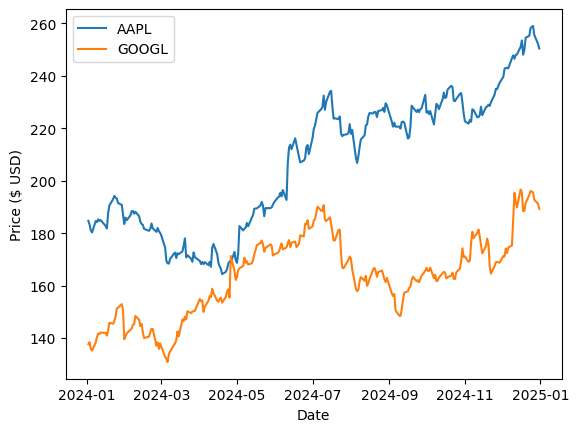

In [48]:
# Let's use matplotlib to do a quick plot of the daily close price, so we can get a feel for the data

# Plot the data
plt.plot(data['Close']['AAPL'], label='AAPL')
plt.plot(data['Close']['GOOGL'], label='GOOGL')

# Format the plot
plt.xlabel('Date')
plt.ylabel('Price ($ USD)')
plt.legend()

plt.show()

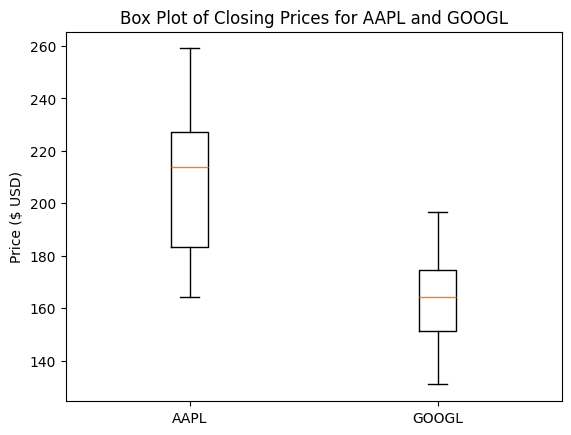

In [60]:
# Let's use matplotlib to create a box plot of the closing prices for AAPL and GOOGL

# Prepare the data for the box plot
closing_prices = [data['Close']['AAPL'], data['Close']['GOOGL']]
labels = ['AAPL', 'GOOGL']

# Create the box plot
plt.boxplot(closing_prices, tick_labels=labels)

# Format the plot
plt.title('Box Plot of Closing Prices for AAPL and GOOGL')
plt.ylabel('Price ($ USD)')

plt.show()

# Questions
Feel free to add and create as many cells as you want to do your answers in.

#### Question 1: What are the mean, median, and standard deviation of the closing prices for AAPL and GOOGL?

[This one has been done for you]

In [49]:
aapl_median = data['Close']['AAPL'].median().round(2)
aapl_mean = data['Close']['AAPL'].mean().round(2)
aapl_std = data['Close']['AAPL'].std().round(2)

googl_median = data['Close']['GOOGL'].median().round(2)
googl_mean = data['Close']['GOOGL'].mean().round(2)
googl_std = data['Close']['GOOGL'].std().round(2)

print(f"AAPL - Median: {aapl_median}, Mean: {aapl_mean}, Std Dev: {aapl_std}")
print(f"GOOGL - Median: {googl_median}, Mean: {googl_mean}, Std Dev: {googl_std}")

print("\nComparison:")
print(f"Median Difference: {aapl_median - googl_median:.02f}")
print(f"Mean Difference: {aapl_mean - googl_mean:.02f}")
print(f"Standard Deviation Difference: {aapl_std - googl_std:.02f}")

AAPL - Median: 213.78, Mean: 206.77, Std Dev: 25.72
GOOGL - Median: 164.42, Mean: 163.41, Std Dev: 15.46

Comparison:
Median Difference: 49.36
Mean Difference: 43.36
Standard Deviation Difference: 10.26


### Question 2: Visualising Trends
What are the daily returns for AAPL and GOOGL, and how do they compare?

Daily returns represent the percentage change in the stock's closing price from one day to the next. It helps you understand how much the stock price changes day-to-day.

Use the `.pct_change()` method in pandas on the 'Close' column to calculate daily returns. Compare the results using a boxplot.

### Question 3: Moving Averages
What are the 7-day and 30-day moving averages for AAPL and GOOGL?

A moving average smooths out price data by creating an average of different subsets of the full data set. It helps identify trends by reducing noise.

Use the `.rolling(window=7).mean()` and `.rolling(window=30).mean()` methods in pandas on the 'Close' column to calculate the moving averages. Plot these averages along with the actual closing prices. What do you notice?

### Question 4: Correlation Analysis
Is there a correlation between the daily returns of AAPL and GOOGL?

Correlation measures the strength and direction of a linear relationship between two variables. A high correlation means the stocks move similarly.

Calculate the correlation coefficient using the `.corr()` method on the daily returns DataFrame (which you computed in Q2). This will give you a value between -1 and 1.

Create another markdown cell and explain what this number indicates. 

Based on how you decide to call the `.corr` function, the associated docs are one of:
 - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
 - https://pandas.pydata.org/docs/reference/api/pandas.Series.corr.html

So it is using the pearson correlation coefficient.

### Question 5: Volatility Analysis
Which stock is more volatile, AAPL or GOOGL?

Volatility refers to the degree of variation in a stock's price. A higher standard deviation of daily returns indicates higher volatility.

Compare the standard deviation of daily returns for both stocks using `.std()` on the daily returns (which you computed in Q2). Which stock has higher volatility?

Is this the case all year round? Compute the volatility of each stock on a monthly basis, and compare them. Is one stock always more volatile? Are their volatilities correlated (i.e., are they both more volatile in the same months, and less volatile in the same months?).

Use appropriate plots and summarise your results.

### Question 6: Highest and Lowest Prices
What were the highest and lowest closing prices for AAPL and GOOGL in the dataset?

Knowing the highest and lowest prices can help you understand the range of price fluctuations over the period.

Use `.max()` and `.min()` on the 'Close' column to find the highest and lowest prices.

### Question 7: Volume Analysis
How does the trading volume of AAPL compare to GOOGL over the year?

Trading volume indicates how many shares were traded. Comparing volumes can show which stock is more actively traded.

Plot the 'Volume' data for both stocks using `matplotlib`. Plot some rolling statistics as well and compare the volumes of the two. Compare them however you want, maybe with some statistics we've already used from above.

### Question 8: Price Range
What is the range of prices (high - low) for each day, and how does it vary over time?

The daily price range shows the difference between the highest and lowest prices each day, indicating intraday volatility.

Subtract the 'Low' column from the 'High' column to get the daily range, and plot this over time using a line plot.

Also compare the intraday price ranges of the two stocks using a box plot.

### Question 9: Cumulative Returns
What are the cumulative returns for AAPL and GOOGL over the period?

Cumulative returns show the total change in value over time, assuming you held the stock from the start to the end of the period.

Use the cumulative product of daily returns plus one `(1 + daily_returns).cumprod()` to calculate cumulative returns, and plot the results. (Daily returns are calculated as per Q2)

Can you explain why you use `(1 + daily_returns).cumprod()` to compute the cumulative returns?